In [13]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the dataset
df = pd.read_csv('/Users/avishandilya/Desktop/Data Analytics/Google Analytics Cert/Capstone project/Dataset/trips_2019_2020.csv')

/var/folders/vj/cqsnsqh97nx_hp4rzxczf28r0000gn/T/ipykernel_23637/1115604494.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/avishandilya/Desktop/Data Analytics/Google Analytics Cert/Capstone project/Dataset/trips_2019_2020.csv')


In [15]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

trip_id          0
usertype         0
date             0
starting_time    0
ending_time      0
day_of_week      0
trip_duration    0
starting_hour    0
dtype: int64

In [19]:
df.head()

,trip_id,usertype,date,starting_time,ending_time,day_of_week,trip_duration,starting_hour
0,21742443,member,2019-01-01,00:04:37,00:11:07,Tuesday,390,0
1,21742444,member,2019-01-01,00:08:13,00:15:34,Tuesday,441,0
2,21742445,member,2019-01-01,00:13:23,00:27:12,Tuesday,829,0
3,21742446,member,2019-01-01,00:13:45,00:43:28,Tuesday,1783,0
4,21742447,member,2019-01-01,00:14:52,00:20:56,Tuesday,364,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773816 entries, 0 to 773815
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   trip_id        773816 non-null  object
 1   usertype       773816 non-null  object
 2   date           773816 non-null  object
 3   starting_time  773816 non-null  object
 4   ending_time    773816 non-null  object
 5   day_of_week    773816 non-null  object
 6   trip_duration  773816 non-null  int64 
 7   starting_hour  773816 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 47.2+ MB


In [249]:
# Number and proportion of annual members to casual riders

df['usertype'].value_counts(normalize=False)  # count
#df['usertype'].value_counts(normalize=True)   # proportion





usertype
member    719416
casual     54400
Name: count, dtype: int64

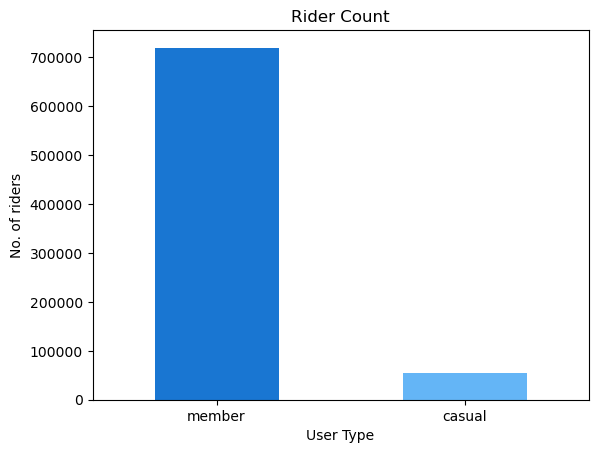

In [45]:
# Number of annual members and casual riders visualisation
df['usertype'].value_counts(normalize=False).plot(kind='bar', color=['#1976D2', '#64B5F6'])

plt.title('Rider Count')
plt.ylabel('No. of riders')
plt.xlabel('User Type')
plt.xticks(rotation=0)
plt.savefig('rider_count.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


In [89]:
# Trip duration descriptive statistics

df['trip_duration'].describe()
df.groupby('usertype')['trip_duration'].describe()


,count,mean,std,min,25%,50%,75%,max
usertype,,,,,,,,
casual,54400.0,2360.553254,5711.124693,0.0,633.0,1263.0,2220.0,86274.0
member,719416.0,691.517272,1420.982535,1.0,317.0,508.0,823.0,85984.0


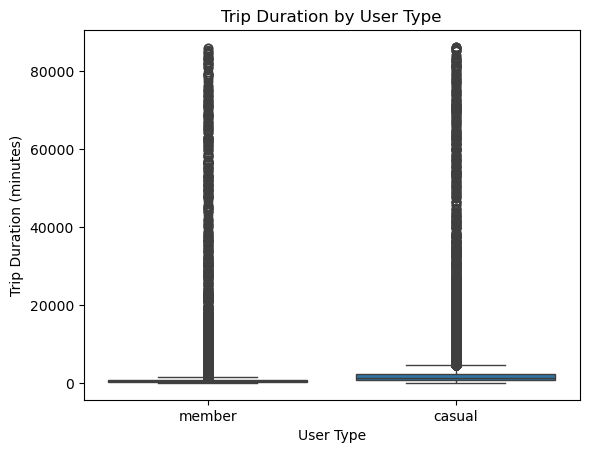

In [55]:
# Check for outliers for trip duration

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='usertype', y='trip_duration', data=df)
plt.title('Trip Duration by User Type')
plt.ylabel('Trip Duration (minutes)')  # adjust if in seconds
plt.xlabel('User Type')
plt.savefig('trip_duration_outliers.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


In [95]:
#Finding cutoff for trip duration

df['trip_duration'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .999])


count    773816.000000
mean        808.852088
std        2086.209953
min           0.000000
25%         324.000000
50%         529.000000
75%         884.000000
90%        1459.000000
95%        1933.000000
99%        4090.850000
99.9%     31065.915000
max       86274.000000
Name: trip_duration, dtype: float64

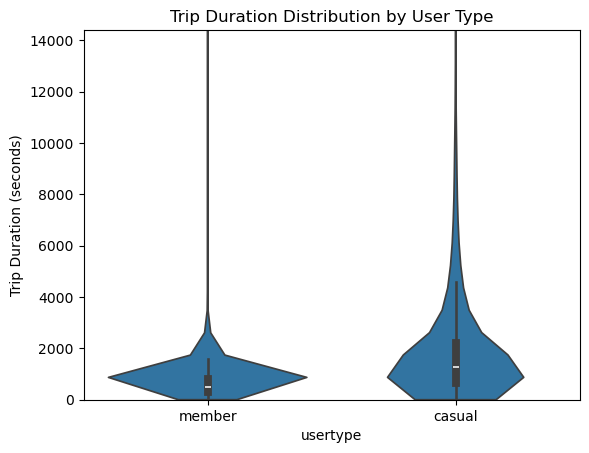

In [117]:
sns.violinplot(x='usertype', y='trip_duration', data=df, cut=0)
plt.ylim(0, 14400)
plt.title('Trip Duration Distribution by User Type')
plt.ylabel('Trip Duration (seconds)')
plt.savefig('trip_duration_violinplot.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


In [127]:
# Create new cleaned data file with trips between 60 - 14400 seconds

df_cleaned = df[(df['trip_duration'] >= 60) & (df['trip_duration'] <= 14400)]


df_cleaned.describe()


,trip_duration,starting_hour
count,764888.000000,764888.000000
mean,744.102882,13.271048
std,786.206406,4.668570
min,60.000000,0.000000
25%,329.000000,9.000000
50%,532.000000,14.000000
75%,887.000000,17.000000
max,14387.000000,23.000000


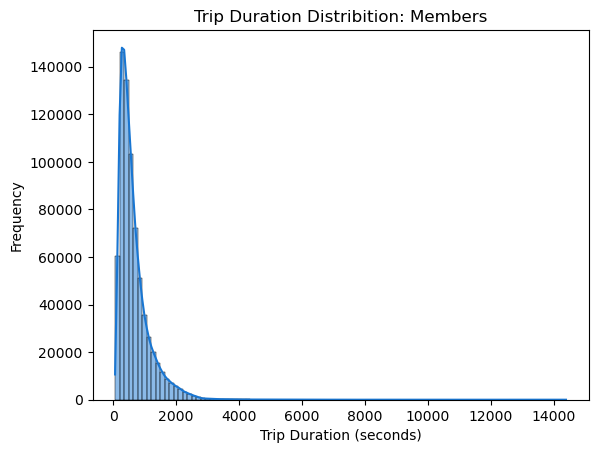

In [163]:
# Analyse trip duration: Check for normality assumption

members = df_cleaned[df_cleaned['usertype'] == 'member']['trip_duration']
casuals = df_cleaned[df_cleaned['usertype'] == 'casual']['trip_duration']

sns.histplot(members, bins=100, kde = True, color ='#1976D2')
plt.title('Trip Duration Distribition: Members')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.savefig('trip_duration_histogram_members.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()
           


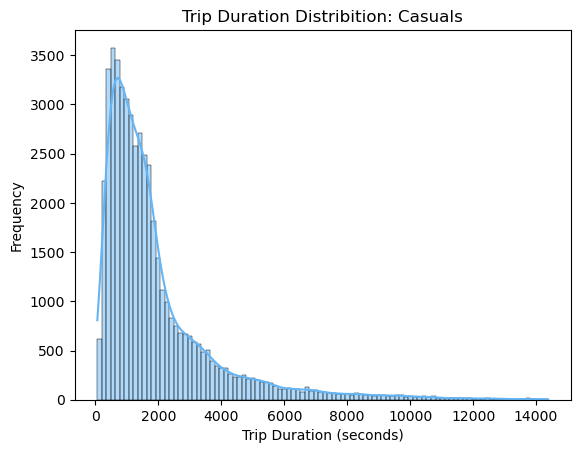

In [161]:

sns.histplot(casuals, bins=100, kde = True, color ='#64B5F6')
plt.title('Trip Duration Distribition: Casuals')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.savefig('trip_duration_histogram_casuals.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [165]:
# Mann Whitney U test for trip duration 

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(members, casuals, alternative='two-sided')
print(f"Mann Whitney U statistic: {stat}, p = {p}")

Mann Whitney U statistic: 6983049257.0, p = 0.0


In [155]:
# Comparing the median trip duration between members and casuals

df_cleaned.groupby('usertype')['trip_duration'].median()

usertype
casual    1348.0
member     510.0
Name: trip_duration, dtype: float64

/var/folders/vj/cqsnsqh97nx_hp4rzxczf28r0000gn/T/ipykernel_23637/2118083237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medians, x = 'usertype', y = 'trip_duration_minutes', palette = ['#64B5F6', '#1976D2'])


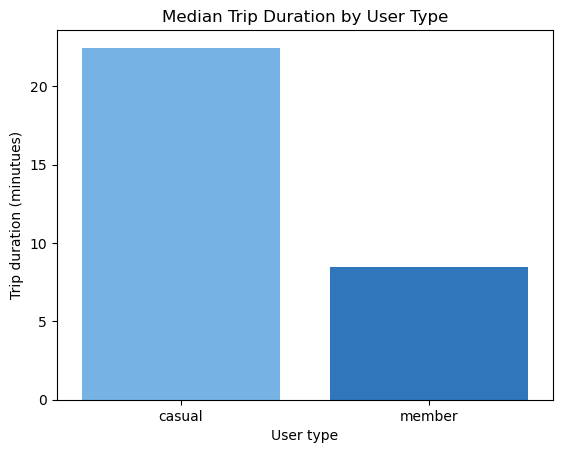

In [173]:
# Visualising the difference in median trip duration between members and casuals

medians = df_cleaned.groupby('usertype')['trip_duration'].median().reset_index()
medians['trip_duration_minutes'] = medians['trip_duration']/ 60 

sns.barplot(data=medians, x = 'usertype', y = 'trip_duration_minutes', palette = ['#64B5F6', '#1976D2'])
plt.title('Median Trip Duration by User Type')
plt.xlabel('User type')
plt.ylabel('Trip duration (minutues)')
plt.savefig('trip_duration_medians.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

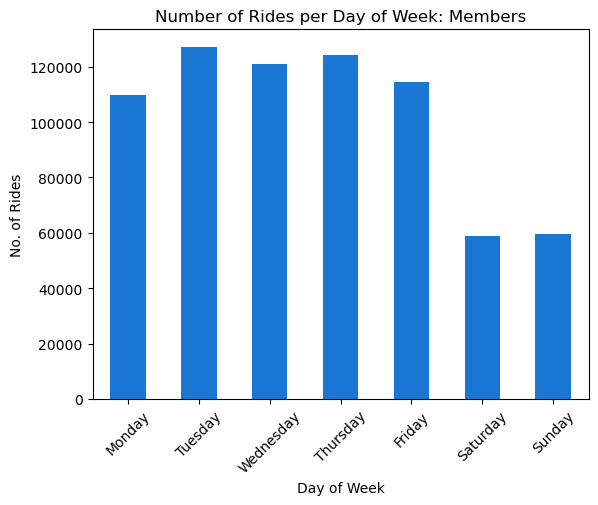

In [207]:
# Number of rides per day of week

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_df = df_cleaned[df_cleaned['usertype']=='member']
weekday_count_member = member_df['day_of_week'].value_counts().reindex(weekday_order)

weekday_count_member.plot(kind='bar', color='#1976D2')
plt.title('Number of Rides per Day of Week: Members')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.xticks(rotation = 45)
plt.savefig('rides_per_day_members.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

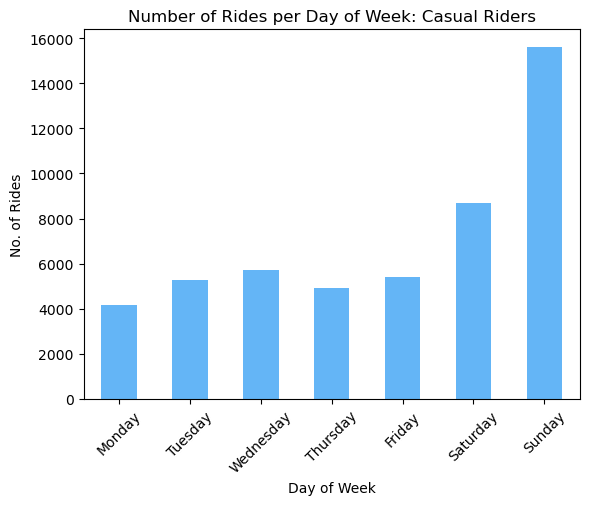

In [209]:
# Number of rides per day of week

casual_df = df_cleaned[df_cleaned['usertype']=='casual']
weekday_count_member = casual_df['day_of_week'].value_counts().reindex(weekday_order)

weekday_count_member.plot(kind='bar', color='#64B5F6')
plt.title('Number of Rides per Day of Week: Casual Riders')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.xticks(rotation = 45)
plt.savefig('rides_per_day_casuals.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

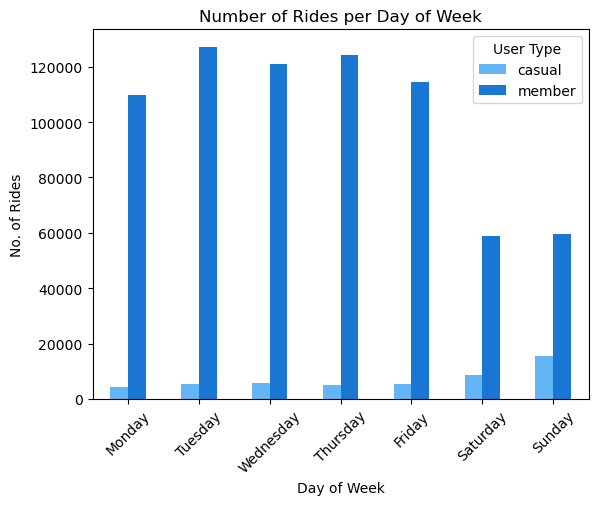

In [219]:
# Number of rides per day of week

weekday_count = df_cleaned.groupby(['day_of_week','usertype']).size().unstack().reindex(weekday_order)

weekday_count.plot(kind='bar', color = ['#64B5F6', '#1976D2'])
plt.title('Number of Rides per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.xticks(rotation = 45)
plt.legend(title = 'User Type')
#plt.savefig('rides_per_day.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()
          





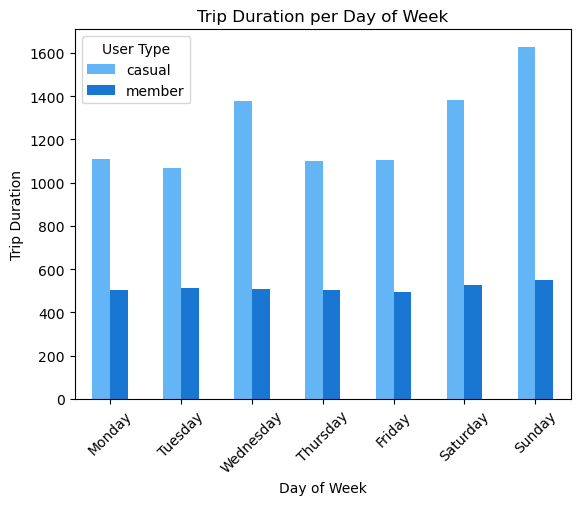

In [247]:
# Trip duration by Day of Week

weekday_trip_duration = df_cleaned.groupby(['day_of_week','usertype'])['trip_duration'].median().unstack().reindex(weekday_order)

weekday_trip_duration.plot(kind='bar', color = ['#64B5F6', '#1976D2'])
plt.title('Trip Duration per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration')
plt.xticks(rotation = 45)
plt.legend(title = 'User Type')
plt.savefig('trip_duration_per_dayofweek.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

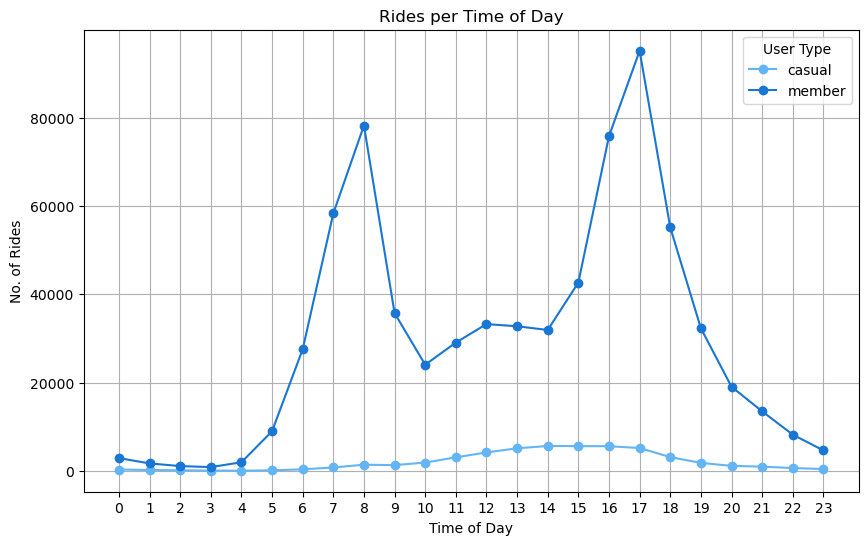

In [241]:
# No. of rides per time of day

hourly_counts = df_cleaned.groupby(['starting_hour', 'usertype']).size().unstack()

hourly_counts.plot(kind='line', figsize=(10, 6), marker='o', color=['#64B5F6', '#1976D2'])
plt.title('Rides per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('No. of Rides')
plt.legend(title = 'User Type')
plt.xticks(range(0,24))
plt.grid(True)
plt.savefig('rides_per_time_of_day.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

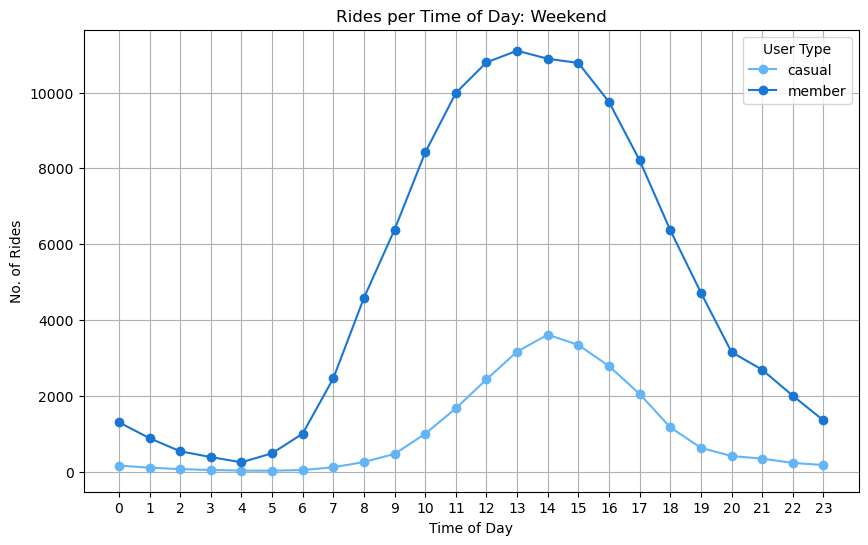

In [245]:
# Number of rides per time of day (weekends)

weekend_df = df_cleaned[df_cleaned['day_of_week'].isin(['Saturday', 'Sunday'])]

weekend_hourly_counts = weekend_df.groupby(['starting_hour', 'usertype']).size().unstack()
weekend_hourly_counts.plot(kind='line', figsize=(10, 6), marker='o', color=['#64B5F6', '#1976D2'])
plt.title('Rides per Time of Day: Weekend')
plt.xlabel('Time of Day')
plt.ylabel('No. of Rides')
plt.legend(title = 'User Type')
plt.xticks(range(0,24))
plt.grid(True)
plt.savefig('rides_per_time_of_day_weekend.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()
